## 1.Read the data set

In [77]:
#importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


import warnings
warnings.filterwarnings('ignore')

In [78]:
# Reading the dataset
df=pd.read_csv(r"C:\Users\Sheetal\Downloads\Iris (1).csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
df.drop('Id', axis =1, inplace= True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
df.drop('Species', axis =1, inplace= True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [81]:
df['ID']= df.index +100

### Here we make ID is dummy column form which we can identify each flower random number of sample.

In [82]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,ID
0,5.1,3.5,1.4,0.2,100
1,4.9,3.0,1.4,0.2,101
2,4.7,3.2,1.3,0.2,102
3,4.6,3.1,1.5,0.2,103
4,5.0,3.6,1.4,0.2,104


In [83]:
df.shape

(150, 5)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   ID             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [85]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,ID
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,174.500000
std,0.828066,0.433594,1.764420,0.763161,43.445368
min,4.300000,2.000000,1.000000,0.100000,100.000000
25%,5.100000,2.800000,1.600000,0.300000,137.250000
50%,5.800000,3.000000,4.350000,1.300000,174.500000
75%,6.400000,3.300000,5.100000,1.800000,211.750000
max,7.900000,4.400000,6.900000,2.500000,249.000000


In [86]:
df.count()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
ID               150
dtype: int64

In [87]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
ID               0
dtype: int64

In [88]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'ID'], dtype='object')

In [89]:
feature = df.columns[:-1]
for i in enumerate(feature):
    print(i)

(0, 'SepalLengthCm')
(1, 'SepalWidthCm')
(2, 'PetalLengthCm')
(3, 'PetalWidthCm')


## 2. EDA

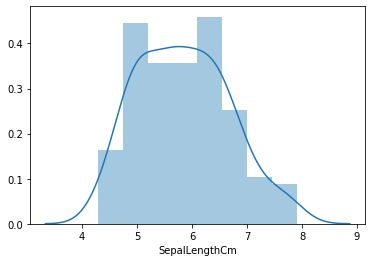

In [90]:
sns.distplot(df['SepalLengthCm'])

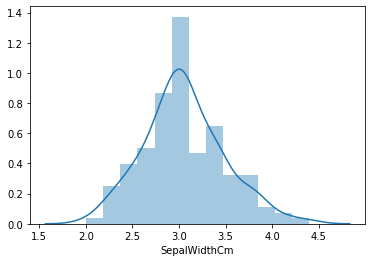

In [91]:
sns.distplot(df['SepalWidthCm'])

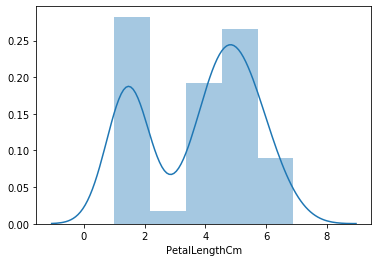

In [92]:
sns.distplot(df['PetalLengthCm'])

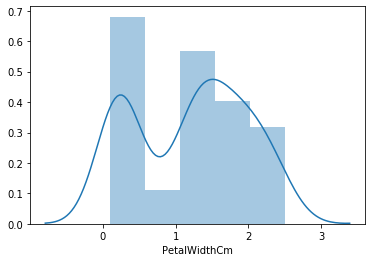

In [93]:
sns.distplot(df['PetalWidthCm'])

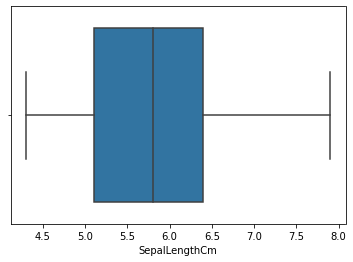

In [94]:
sns.boxplot(x=df["SepalLengthCm"])

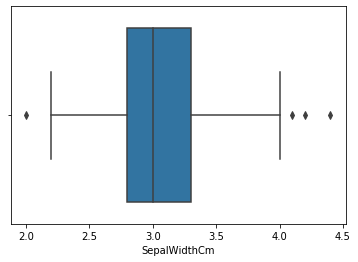

In [95]:
sns.boxplot(x=df["SepalWidthCm"])

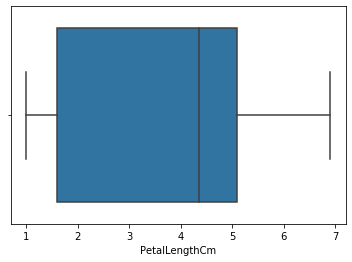

In [96]:
sns.boxplot(x=df["PetalLengthCm"])

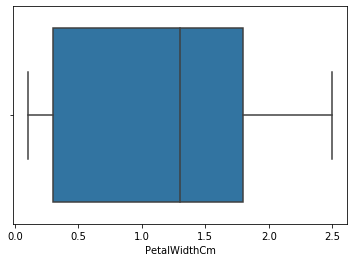

In [97]:
sns.boxplot(x=df["PetalWidthCm"])

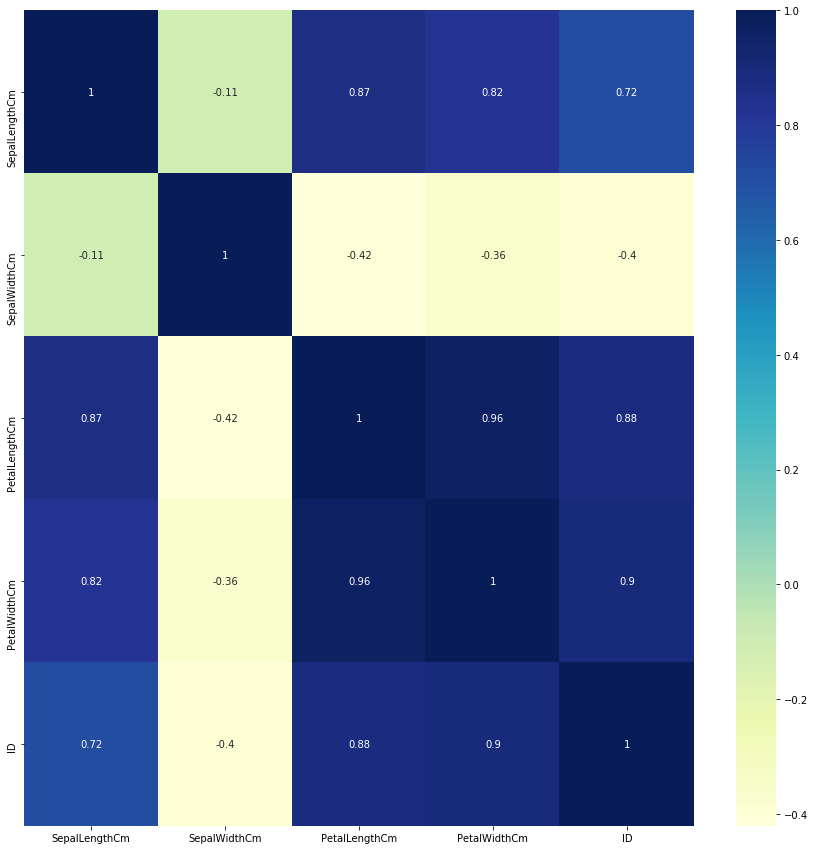

In [98]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

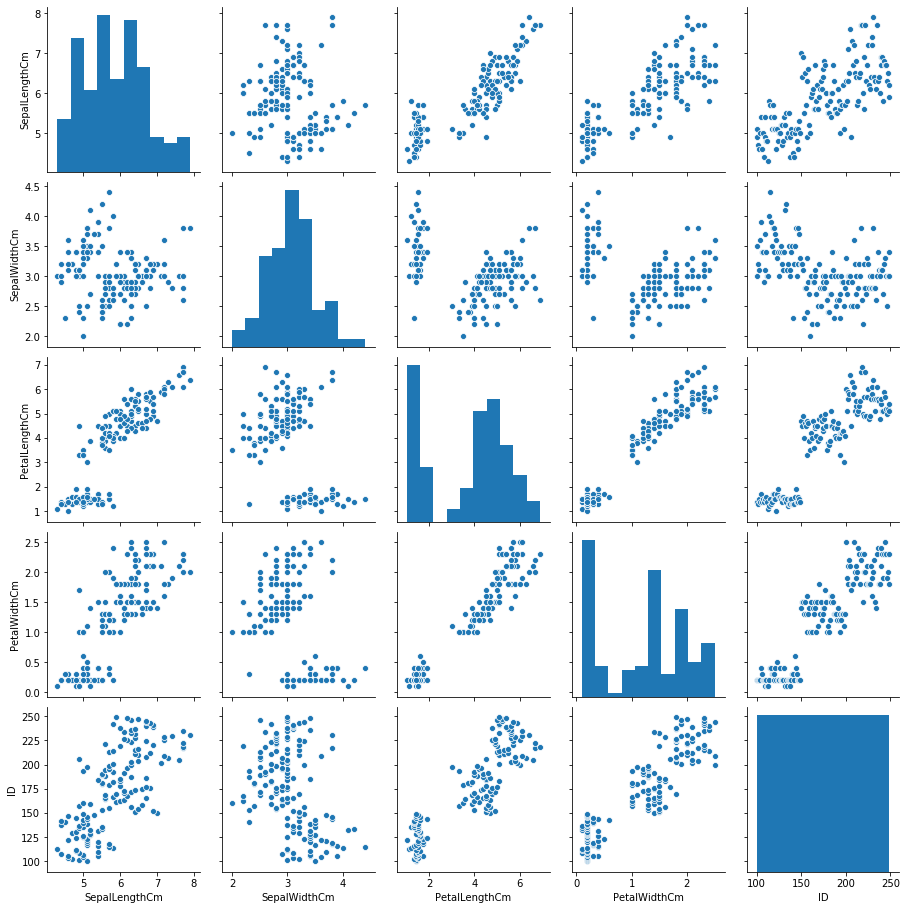

In [99]:
sns.pairplot(df)
plt.show()

## 3. Data pre-processing

#### Outlier Treatment

In [100]:
q1= df ['SepalWidthCm'].quantile(0.01)
q4 =df ['SepalWidthCm'].quantile(0.01)
df['SepalWidthCm'][df['SepalWidthCm']<=q1]=q1
df['SepalWidthCm'][df['SepalWidthCm']>=q4]=q4

In [101]:
df1= df.drop('ID',axis=1, inplace= False)
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,2.2,1.4,0.2
1,4.9,2.2,1.4,0.2
2,4.7,2.2,1.3,0.2
3,4.6,2.2,1.5,0.2
4,5.0,2.2,1.4,0.2


### Check the Hopkins Score

In [102]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [103]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [104]:
round(hopkins(df1), 2)

0.86

In [105]:
X=df1
hopkins(X)#, "SepalWidthCm", "PetalWidthCm"]])

0.862554541286094

In [106]:
round(hopkins(df1),2)

0.84

### Note: According to external reference, a value for higher than 0.88 indicates a clustering tendency at the 90% confidence level. Thus we are good to proceed with K-Means Clustering

### 4. Scaling

In [107]:
df_kmeans = df1
df_kmeans.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,2.2,1.4,0.2
1,4.9,2.2,1.4,0.2
2,4.7,2.2,1.3,0.2
3,4.6,2.2,1.5,0.2
4,5.0,2.2,1.4,0.2


### 5. Kmeans Clustering
##### Lets create a seperate dataframe only for kmeans

In [108]:
#Lets start with a random number of clusters
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(df_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [109]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

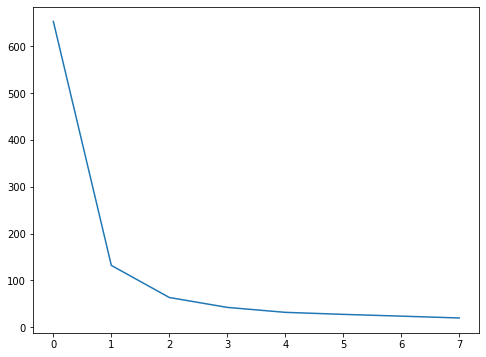

In [110]:
#lets find the optimum number of clusters
# elbow-curve/SSD
ssd = []
range_n_clusters = [1,2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_kmeans)
    
    ssd.append(kmeans.inertia_)
plt.figure(figsize=[8,6])
plt.plot(ssd)

**Note**: From the above plots, we conclude that the optimal value of K (number of clusters) could be between 5, 6 or 7.

#### Here we can see that the curve decreases steeply around 3-4. Lets take silhouette Curve into consideration for a better understanding.

### 6. Sillhouette analysis

In [111]:
#sillhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_kmeans)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_kmeans, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.7019459463709093
For n_clusters=3, the silhouette score is 0.5847390326394666
For n_clusters=4, the silhouette score is 0.5430491590061454
For n_clusters=5, the silhouette score is 0.5463337347918333
For n_clusters=6, the silhouette score is 0.5363674900410235
For n_clusters=7, the silhouette score is 0.39196940916270334


Here we can see the optimal Number of clusters is 3

In [112]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [113]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [114]:
df_kmeans["kmeans_cluster"] = kmeans.labels_
df_kmeans

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,kmeans_cluster
0,5.1,2.2,1.4,0.2,0
1,4.9,2.2,1.4,0.2,0
2,4.7,2.2,1.3,0.2,0
3,4.6,2.2,1.5,0.2,0
4,5.0,2.2,1.4,0.2,0
...,...,...,...,...,...
145,6.7,2.2,5.2,2.3,2
146,6.3,2.2,5.0,1.9,1
147,6.5,2.2,5.2,2.0,2
148,6.2,2.2,5.4,2.3,2


In [115]:
df_kmeans.kmeans_cluster.value_counts()

1    62
0    50
2    38
Name: kmeans_cluster, dtype: int64

In [116]:
df_kmeans.loc[df_kmeans["kmeans_cluster"]==0]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,kmeans_cluster
0,5.1,2.2,1.4,0.2,0
1,4.9,2.2,1.4,0.2,0
2,4.7,2.2,1.3,0.2,0
3,4.6,2.2,1.5,0.2,0
4,5.0,2.2,1.4,0.2,0
5,5.4,2.2,1.7,0.4,0
6,4.6,2.2,1.4,0.3,0
7,5.0,2.2,1.5,0.2,0
8,4.4,2.2,1.4,0.2,0
9,4.9,2.2,1.5,0.1,0


In [117]:
df_kmeans.loc[df_kmeans["kmeans_cluster"]==1]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,kmeans_cluster
50,7.0,2.2,4.7,1.4,1
51,6.4,2.2,4.5,1.5,1
53,5.5,2.2,4.0,1.3,1
54,6.5,2.2,4.6,1.5,1
55,5.7,2.2,4.5,1.3,1
...,...,...,...,...,...
133,6.3,2.2,5.1,1.5,1
138,6.0,2.2,4.8,1.8,1
142,5.8,2.2,5.1,1.9,1
146,6.3,2.2,5.0,1.9,1


In [118]:
df_kmeans.loc[df_kmeans["kmeans_cluster"]==2]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,kmeans_cluster
52,6.9,2.2,4.9,1.5,2
77,6.7,2.2,5.0,1.7,2
100,6.3,2.2,6.0,2.5,2
102,7.1,2.2,5.9,2.1,2
103,6.3,2.2,5.6,1.8,2
104,6.5,2.2,5.8,2.2,2
105,7.6,2.2,6.6,2.1,2
107,7.3,2.2,6.3,1.8,2
108,6.7,2.2,5.8,1.8,2
109,7.2,2.2,6.1,2.5,2


In [119]:
df["kmeans_cluster"]=kmeans.labels_
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,ID,kmeans_cluster
0,5.1,2.2,1.4,0.2,100,0
1,4.9,2.2,1.4,0.2,101,0
2,4.7,2.2,1.3,0.2,102,0
3,4.6,2.2,1.5,0.2,103,0
4,5.0,2.2,1.4,0.2,104,0
...,...,...,...,...,...,...
145,6.7,2.2,5.2,2.3,245,2
146,6.3,2.2,5.0,1.9,246,1
147,6.5,2.2,5.2,2.0,247,2
148,6.2,2.2,5.4,2.3,248,2


In [120]:
df.kmeans_cluster.value_counts()

1    62
0    50
2    38
Name: kmeans_cluster, dtype: int64

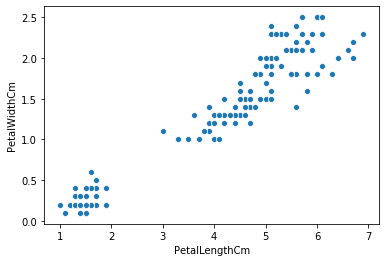

In [121]:
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",data=df)
plt.show()

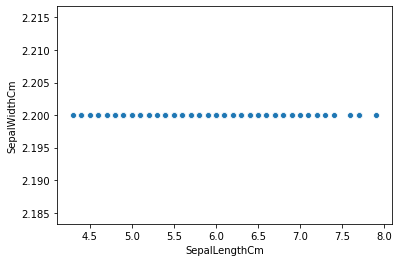

In [122]:
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=df)
plt.show()

In [123]:
df.loc[df["kmeans_cluster"]==1]["PetalLengthCm"]

50     4.7
51     4.5
53     4.0
54     4.6
55     4.5
      ... 
133    5.1
138    4.8
142    5.1
146    5.0
149    5.1
Name: PetalLengthCm, Length: 62, dtype: float64

In [124]:
df.groupby('kmeans_cluster').apply(lambda x: x.sort_values("PetalLengthCm"))

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
kmeans_cluster                                                                 
0              22             4.6           2.2            1.0           0.2   
               13             4.3           2.2            1.1           0.1   
               14             5.8           2.2            1.2           0.2   
               35             5.0           2.2            1.2           0.2   
               36             5.5           2.2            1.3           0.2   
...                           ...           ...            ...           ...   
2              131            7.9           2.2            6.4           2.0   
               105            7.6           2.2            6.6           2.1   
               117            7.7           2.2            6.7           2.2   
               122            7.7           2.2            6.7           2.0   
               118            7.7           2.2            6.9           2.3   

                     ID  kmeans_cluster  
kmeans_cluster                           
0              22   122               0  
               13   113               0  
               14   114               0  
               35   135               0  
               36   136               0  
...                 ...             ...  
2              131  231               2  
               105  205               2  
               117  217               2  
               122  222               2  
               118  218               2  

[150 rows x 6 columns]

In [125]:
df.groupby('kmeans_cluster').apply(lambda x: x.sort_values('PetalWidthCm'))

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
kmeans_cluster                                                                 
0              34             4.9           2.2            1.5           0.1   
               37             4.9           2.2            1.5           0.1   
               32             5.2           2.2            1.5           0.1   
               13             4.3           2.2            1.1           0.1   
               9              4.9           2.2            1.5           0.1   
...                           ...           ...            ...           ...   
2              136            6.3           2.2            5.6           2.4   
               140            6.7           2.2            5.6           2.4   
               100            6.3           2.2            6.0           2.5   
               144            6.7           2.2            5.7           2.5   
               109            7.2           2.2            6.1           2.5   

                     ID  kmeans_cluster  
kmeans_cluster                           
0              34   134               0  
               37   137               0  
               32   132               0  
               13   113               0  
               9    109               0  
...                 ...             ...  
2              136  236               2  
               140  240               2  
               100  200               2  
               144  244               2  
               109  209               2  

[150 rows x 6 columns]

In [126]:
df.groupby('kmeans_cluster').apply(lambda x: x.sort_values('SepalLengthCm'))

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
kmeans_cluster                                                                 
0              13             4.3           2.2            1.1           0.1   
               8              4.4           2.2            1.4           0.2   
               38             4.4           2.2            1.3           0.2   
               42             4.4           2.2            1.3           0.2   
               41             4.5           2.2            1.3           0.3   
...                           ...           ...            ...           ...   
2              135            7.7           2.2            6.1           2.3   
               118            7.7           2.2            6.9           2.3   
               117            7.7           2.2            6.7           2.2   
               122            7.7           2.2            6.7           2.0   
               131            7.9           2.2            6.4           2.0   

                     ID  kmeans_cluster  
kmeans_cluster                           
0              13   113               0  
               8    108               0  
               38   138               0  
               42   142               0  
               41   141               0  
...                 ...             ...  
2              135  235               2  
               118  218               2  
               117  217               2  
               122  222               2  
               131  231               2  

[150 rows x 6 columns]

In [127]:
df.groupby('kmeans_cluster').apply(lambda x: x.sort_values('SepalWidthCm'))

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
kmeans_cluster                                                                 
0              0              5.1           2.2            1.4           0.2   
               27             5.2           2.2            1.5           0.2   
               28             5.2           2.2            1.4           0.2   
               29             4.7           2.2            1.6           0.2   
               30             4.8           2.2            1.6           0.2   
...                           ...           ...            ...           ...   
2              116            6.5           2.2            5.5           1.8   
               117            7.7           2.2            6.7           2.2   
               118            7.7           2.2            6.9           2.3   
               109            7.2           2.2            6.1           2.5   
               148            6.2           2.2            5.4           2.3   

                     ID  kmeans_cluster  
kmeans_cluster                           
0              0    100               0  
               27   127               0  
               28   128               0  
               29   129               0  
               30   130               0  
...                 ...             ...  
2              116  216               2  
               117  217               2  
               118  218               2  
               109  209               2  
               148  248               2  

[150 rows x 6 columns]

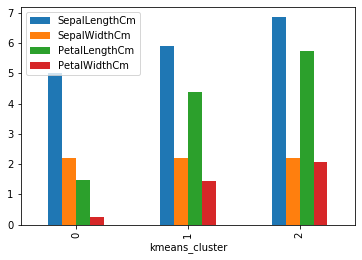

In [128]:
df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].groupby(df['kmeans_cluster']).mean().plot(kind='bar')

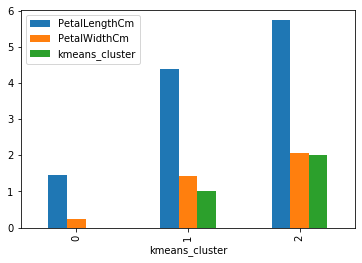

In [129]:
#Let drop the ID, SepalLengthCm, SepalWidthCm
df.drop(["ID",'SepalLengthCm','SepalWidthCm'],axis=1).groupby(df['kmeans_cluster']).mean().plot(kind='bar')

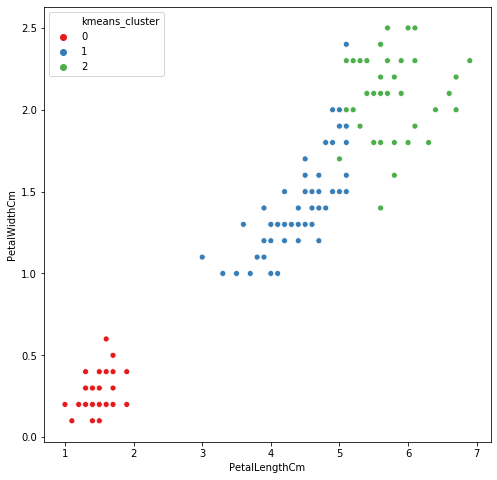

In [130]:
plt.figure(figsize=[8,8])
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='kmeans_cluster',legend='full',data=df,palette='Set1')
plt.show()

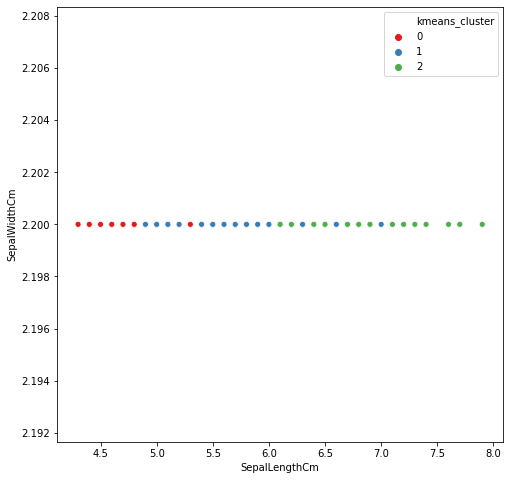

In [131]:
plt.figure(figsize=[8,8])
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='kmeans_cluster',legend='full',data=df,palette='Set1')
plt.show()

In [132]:
df[df['kmeans_cluster']==0].sort_values(by=['PetalLengthCm','PetalWidthCm'], ascending=[False,True])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,ID,kmeans_cluster
24,4.8,2.2,1.9,0.2,124,0
44,5.1,2.2,1.9,0.4,144,0
20,5.4,2.2,1.7,0.2,120,0
18,5.7,2.2,1.7,0.3,118,0
5,5.4,2.2,1.7,0.4,105,0
23,5.1,2.2,1.7,0.5,123,0
11,4.8,2.2,1.6,0.2,111,0
25,5.0,2.2,1.6,0.2,125,0
29,4.7,2.2,1.6,0.2,129,0
30,4.8,2.2,1.6,0.2,130,0


In [133]:
list(df[df['kmeans_cluster']==0].sort_values(by=['SepalLengthCm','SepalWidthCm'], ascending=[False,True,])['ID'])

[114,
 115,
 118,
 133,
 136,
 105,
 110,
 116,
 120,
 131,
 148,
 127,
 128,
 132,
 100,
 117,
 119,
 121,
 123,
 139,
 144,
 146,
 104,
 107,
 125,
 126,
 135,
 140,
 143,
 149,
 101,
 109,
 134,
 137,
 111,
 112,
 124,
 130,
 145,
 102,
 129,
 103,
 106,
 122,
 147,
 141,
 108,
 138,
 142,
 113]

## 7.Hierarchical Clustering Single Method

#### Lets Scale the data and create a fresh new dataframe.

In [134]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,ID,kmeans_cluster
0,5.1,2.2,1.4,0.2,100,0
1,4.9,2.2,1.4,0.2,101,0
2,4.7,2.2,1.3,0.2,102,0
3,4.6,2.2,1.5,0.2,103,0
4,5.0,2.2,1.4,0.2,104,0


In [135]:
scaler=StandardScaler()
df_hierarchial_scaled=scaler.fit_transform(df)
df_hierarchial_scaled

array([[-9.00681170e-01,  1.00000000e+00, -1.34127240e+00,
        -1.31297673e+00, -1.72054204e+00, -1.20774157e+00],
       [-1.14301691e+00,  1.00000000e+00, -1.34127240e+00,
        -1.31297673e+00, -1.69744751e+00, -1.20774157e+00],
       [-1.38535265e+00,  1.00000000e+00, -1.39813811e+00,
        -1.31297673e+00, -1.67435299e+00, -1.20774157e+00],
       [-1.50652052e+00,  1.00000000e+00, -1.28440670e+00,
        -1.31297673e+00, -1.65125846e+00, -1.20774157e+00],
       [-1.02184904e+00,  1.00000000e+00, -1.34127240e+00,
        -1.31297673e+00, -1.62816394e+00, -1.20774157e+00],
       [-5.37177559e-01,  1.00000000e+00, -1.17067529e+00,
        -1.05003079e+00, -1.60506942e+00, -1.20774157e+00],
       [-1.50652052e+00,  1.00000000e+00, -1.34127240e+00,
        -1.18150376e+00, -1.58197489e+00, -1.20774157e+00],
       [-1.02184904e+00,  1.00000000e+00, -1.28440670e+00,
        -1.31297673e+00, -1.55888037e+00, -1.20774157e+00],
       [-1.74885626e+00,  1.00000000e+00, -1.341

In [136]:
df_hierarchial_scaled.shape

(150, 6)

In [137]:
df_hier_scaled=pd.DataFrame(df_hierarchial_scaled)
df_hier_scaled.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','ID','kmeans_cluster']
df_hier_scaled.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,ID,kmeans_cluster
0,-0.900681,1.0,-1.341272,-1.312977,-1.720542,-1.207742
1,-1.143017,1.0,-1.341272,-1.312977,-1.697448,-1.207742
2,-1.385353,1.0,-1.398138,-1.312977,-1.674353,-1.207742
3,-1.506521,1.0,-1.284407,-1.312977,-1.651258,-1.207742
4,-1.021849,1.0,-1.341272,-1.312977,-1.628164,-1.207742


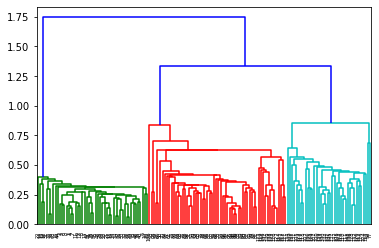

In [138]:
#single Linkage
mergings = linkage(df_hier_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

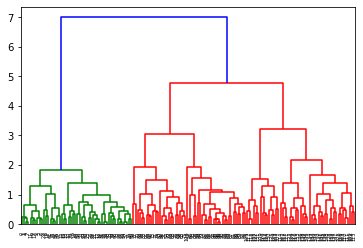

<Figure size 1440x1080 with 0 Axes>

In [139]:
# complete linkage
mergings = linkage(df_hier_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.figure(figsize=[20,15])
plt.show()

In [140]:
# we need 3 clusters after some hit and trial, 3 cluster best shows the data.
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [141]:
df_hier_scaled["hier_cluster"]=cluster_labels
df_hier_scaled

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,ID,kmeans_cluster,hier_cluster
0,-0.900681,1.0,-1.341272,-1.312977,-1.720542,-1.207742,0
1,-1.143017,1.0,-1.341272,-1.312977,-1.697448,-1.207742,0
2,-1.385353,1.0,-1.398138,-1.312977,-1.674353,-1.207742,0
3,-1.506521,1.0,-1.284407,-1.312977,-1.651258,-1.207742,0
4,-1.021849,1.0,-1.341272,-1.312977,-1.628164,-1.207742,0
...,...,...,...,...,...,...,...
145,1.038005,1.0,0.819624,1.447956,1.628164,1.417784,2
146,0.553333,1.0,0.705893,0.922064,1.651258,0.105021,2
147,0.795669,1.0,0.819624,1.053537,1.674353,1.417784,2
148,0.432165,1.0,0.933356,1.447956,1.697448,1.417784,2


In [142]:
df["hier_cluster"] = cluster_labels
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,ID,kmeans_cluster,hier_cluster
0,5.1,2.2,1.4,0.2,100,0,0
1,4.9,2.2,1.4,0.2,101,0,0
2,4.7,2.2,1.3,0.2,102,0,0
3,4.6,2.2,1.5,0.2,103,0,0
4,5.0,2.2,1.4,0.2,104,0,0
...,...,...,...,...,...,...,...
145,6.7,2.2,5.2,2.3,245,2,2
146,6.3,2.2,5.0,1.9,246,1,2
147,6.5,2.2,5.2,2.0,247,2,2
148,6.2,2.2,5.4,2.3,248,2,2


In [143]:
df.hier_cluster.value_counts()

1    51
0    50
2    49
Name: hier_cluster, dtype: int64

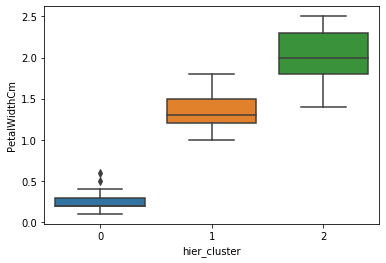

In [144]:
sns.boxplot(x="hier_cluster",y="PetalWidthCm",data=df)
plt.show()

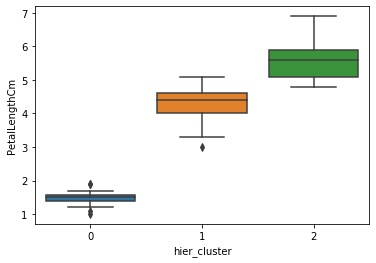

In [145]:
sns.boxplot(x="hier_cluster",y="PetalLengthCm",data=df)
plt.show()

In [146]:
df.loc[df["hier_cluster"]==0]['ID']

0     100
1     101
2     102
3     103
4     104
5     105
6     106
7     107
8     108
9     109
10    110
11    111
12    112
13    113
14    114
15    115
16    116
17    117
18    118
19    119
20    120
21    121
22    122
23    123
24    124
25    125
26    126
27    127
28    128
29    129
30    130
31    131
32    132
33    133
34    134
35    135
36    136
37    137
38    138
39    139
40    140
41    141
42    142
43    143
44    144
45    145
46    146
47    147
48    148
49    149
Name: ID, dtype: int64

In [147]:
df.loc[df["hier_cluster"]==1]['ID']

50     150
51     151
52     152
53     153
54     154
55     155
56     156
57     157
58     158
59     159
60     160
61     161
62     162
63     163
64     164
65     165
66     166
67     167
68     168
69     169
70     170
71     171
72     172
73     173
74     174
75     175
76     176
77     177
78     178
79     179
80     180
81     181
82     182
83     183
84     184
85     185
86     186
87     187
88     188
89     189
90     190
91     191
92     192
93     193
94     194
95     195
96     196
97     197
98     198
99     199
106    206
Name: ID, dtype: int64

In [148]:
df.loc[df["hier_cluster"]==2]['ID']

100    200
101    201
102    202
103    203
104    204
105    205
107    207
108    208
109    209
110    210
111    211
112    212
113    213
114    214
115    215
116    216
117    217
118    218
119    219
120    220
121    221
122    222
123    223
124    224
125    225
126    226
127    227
128    228
129    229
130    230
131    231
132    232
133    233
134    234
135    235
136    236
137    237
138    238
139    239
140    240
141    241
142    242
143    243
144    244
145    245
146    246
147    247
148    248
149    249
Name: ID, dtype: int64

In [149]:
df.groupby('hier_cluster').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,ID,kmeans_cluster
hier_cluster,,,,,,
0,5.006000,2.2,1.464000,0.244000,124.500000,0.000000
1,5.915686,2.2,4.264706,1.333333,175.117647,1.039216
2,6.622449,2.2,5.573469,2.032653,224.877551,1.734694


In [150]:
df.groupby('hier_cluster').apply(lambda x: x.sort_values('PetalWidthCm'))

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
hier_cluster                                                                 
0            34             4.9           2.2            1.5           0.1   
             37             4.9           2.2            1.5           0.1   
             32             5.2           2.2            1.5           0.1   
             13             4.3           2.2            1.1           0.1   
             9              4.9           2.2            1.5           0.1   
...                         ...           ...            ...           ...   
2            136            6.3           2.2            5.6           2.4   
             140            6.7           2.2            5.6           2.4   
             109            7.2           2.2            6.1           2.5   
             144            6.7           2.2            5.7           2.5   
             100            6.3           2.2            6.0           2.5   

                   ID  kmeans_cluster  hier_cluster  
hier_cluster                                         
0            34   134               0             0  
             37   137               0             0  
             32   132               0             0  
             13   113               0             0  
             9    109               0             0  
...               ...             ...           ...  
2            136  236               2             2  
             140  240               2             2  
             109  209               2             2  
             144  244               2             2  
             100  200               2             2  

[150 rows x 7 columns]

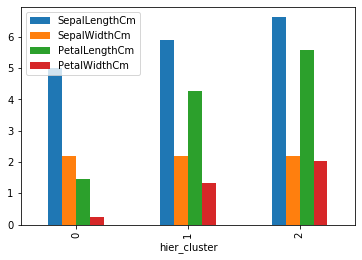

In [151]:
df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].groupby(df['hier_cluster']).mean().plot(kind='bar')

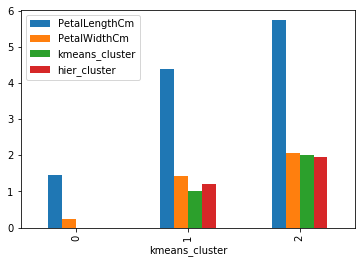

In [152]:
df.drop(["ID",'SepalLengthCm','SepalWidthCm'],axis=1).groupby(df['kmeans_cluster']).mean().plot(kind='bar')

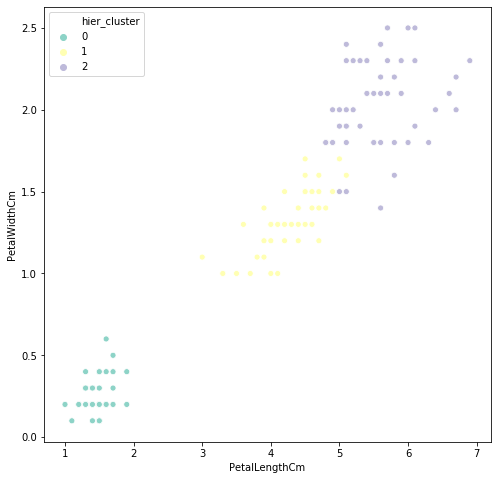

In [155]:
plt.figure(figsize=[8,8])
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='hier_cluster',legend='full',data=df,palette='Set3')
plt.show()

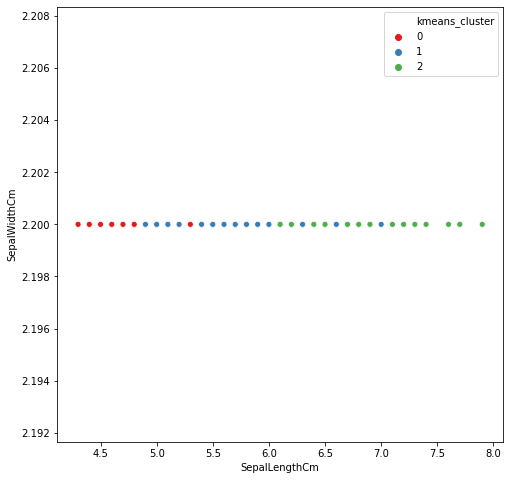

In [157]:
plt.figure(figsize=[8,8])
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='kmeans_cluster',legend='full',data=df,palette='Set1')
plt.show()

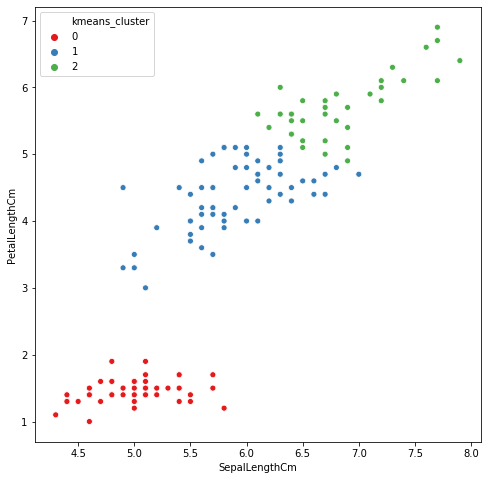

In [158]:
plt.figure(figsize=[8,8])
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',hue='kmeans_cluster',legend='full',data=df,palette='Set1')
plt.show()

In [164]:
df[df['hier_cluster']==1].sort_values(by=['SepalLengthCm','PetalLengthCm','PetalWidthCm'], ascending=[True,True,False])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,ID,kmeans_cluster,hier_cluster
57,4.9,2.2,3.3,1.0,157,1,1
106,4.9,2.2,4.5,1.7,206,1,1
93,5.0,2.2,3.3,1.0,193,1,1
60,5.0,2.2,3.5,1.0,160,1,1
98,5.1,2.2,3.0,1.1,198,1,1
59,5.2,2.2,3.9,1.4,159,1,1
84,5.4,2.2,4.5,1.5,184,1,1
81,5.5,2.2,3.7,1.0,181,1,1
80,5.5,2.2,3.8,1.1,180,1,1
53,5.5,2.2,4.0,1.3,153,1,1


In [160]:
df[df['hier_cluster']==2].sort_values(by=['SepalLengthCm','PetalLengthCm','PetalWidthCm'], ascending=[True,True,False])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,ID,kmeans_cluster,hier_cluster
121,5.6,2.2,4.9,2.0,221,1,2
113,5.7,2.2,5.0,2.0,213,1,2
114,5.8,2.2,5.1,2.4,214,1,2
101,5.8,2.2,5.1,1.9,201,1,2
142,5.8,2.2,5.1,1.9,242,1,2
149,5.9,2.2,5.1,1.8,249,1,2
138,6.0,2.2,4.8,1.8,238,1,2
119,6.0,2.2,5.0,1.5,219,1,2
127,6.1,2.2,4.9,1.8,227,1,2
134,6.1,2.2,5.6,1.4,234,2,2


In [161]:
df[df['hier_cluster']==0].sort_values(by=['SepalLengthCm','PetalLengthCm','PetalWidthCm'], ascending=[True,True,False]).head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,ID,kmeans_cluster,hier_cluster
13,4.3,2.2,1.1,0.1,113,0,0
38,4.4,2.2,1.3,0.2,138,0,0
42,4.4,2.2,1.3,0.2,142,0,0
8,4.4,2.2,1.4,0.2,108,0,0
41,4.5,2.2,1.3,0.3,141,0,0
22,4.6,2.2,1.0,0.2,122,0,0
6,4.6,2.2,1.4,0.3,106,0,0
47,4.6,2.2,1.4,0.2,147,0,0
3,4.6,2.2,1.5,0.2,103,0,0
2,4.7,2.2,1.3,0.2,102,0,0


In [163]:
list(df[df['hier_cluster']==0].sort_values(by=['SepalLengthCm','PetalLengthCm','PetalWidthCm'], ascending=[True,True,False])['ID'])

[113,
 138,
 142,
 108,
 141,
 122,
 106,
 147,
 103,
 102,
 129,
 145,
 112,
 111,
 130,
 124,
 101,
 109,
 134,
 137,
 135,
 140,
 104,
 149,
 107,
 143,
 126,
 125,
 117,
 100,
 121,
 119,
 139,
 146,
 123,
 144,
 128,
 127,
 132,
 148,
 116,
 131,
 110,
 105,
 120,
 136,
 133,
 115,
 118,
 114]

### Conclusion from Hierarchial Clustering:
Cluster 0 - > Lowest Numbers of Flowers
Cluster 1 - > Average Numbers of Flowers
Cluster 2 - > Highest Numbers of Flowers
Iris Flowers in cluster 2 - > Have high numbers of flowers.